<a href="https://colab.research.google.com/github/nikhilbansal23/DeliveryMarketModelling/blob/main/Delivery_Market_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [131]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [132]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Delhivery - Delivery Market Modelling/delhivery_data.csv')

In [133]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [134]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

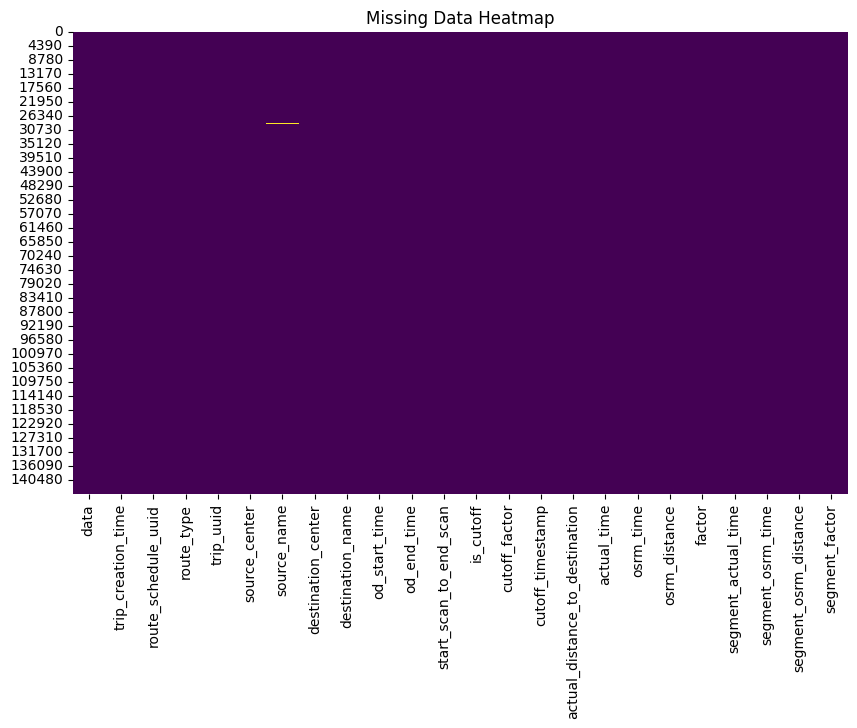

In [136]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [137]:
df['source_name'].fillna('not known', inplace=True)
df['destination_name'].fillna('not known', inplace=True)


In [138]:
df['source_states'] = df['source_name'].str.extract(r'\((.*?)\)')
df['destination_states'] = df['destination_name'].str.extract(r'\((.*?)\)')

In [139]:
df['source_cities'] = df['source_name'].str.extract(r'^([^_]+)')
df['destination_cities'] = df['destination_name'].str.extract(r'^([^_]+)')

In [140]:
# List of columns to be dropped
columns_to_drop = ['source_name', 'destination_name','route_schedule_uuid','trip_uuid']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [141]:
df['is_cutoff'].value_counts()

True     118749
False     26118
Name: is_cutoff, dtype: int64

In [142]:
df['route_type'].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

In [143]:
df[['od_start_time', 'od_end_time','trip_creation_time','cutoff_timestamp']] = df[['od_start_time', 'od_end_time','trip_creation_time','cutoff_timestamp']].apply(pd.to_datetime)

In [144]:
#hours difference between between trip creation and order start
df['delay_creation_start_hrs_diff'] = (df['od_start_time'] - df['trip_creation_time']).dt.total_seconds() / 3600
df['delay_creation_start_hrs_diff'] = df['delay_creation_start_hrs_diff'].round().astype(int)



In [145]:
#hours difference between cut-off and delivery time
df['delay_cutoff_delivery_hrs_diff'] = (df['cutoff_timestamp'] - df['od_end_time']).dt.total_seconds() / 3600
df['delay_cutoff_delivery_hrs_diff'] = df['delay_cutoff_delivery_hrs_diff'].round().astype(int)


In [146]:
# actualy delay in hours
df['delivery_hrs'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600
df['delivery_hrs'] = df['delivery_hrs'].round().astype(int)

In [147]:
# Extract month and year into separate columns
df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_year'] = df['trip_creation_time'].dt.year

In [148]:
# Convert columns to datetime objects and extract date part
df['actual_delivery_date'] = pd.to_datetime(df['od_end_time']).dt.date
df['promised_date'] = pd.to_datetime(df['cutoff_timestamp']).dt.date

# Calculate whether the delivery was on-time or not
df['on_time'] = df['actual_delivery_date'] <= df['promised_date']


In [149]:
df['on_time'].value_counts()

True     104896
False     39971
Name: on_time, dtype: int64

In [150]:
#Calculate the On-Time Delivery Rate
on_time_delivery_rate = (df['on_time'].sum() / len(df)) * 100

print("On-Time Delivery Rate: {:.2f}%".format(on_time_delivery_rate))

On-Time Delivery Rate: 72.41%


# Understanding Data with Viz's

## Observing delivery hours where delivery is in same state

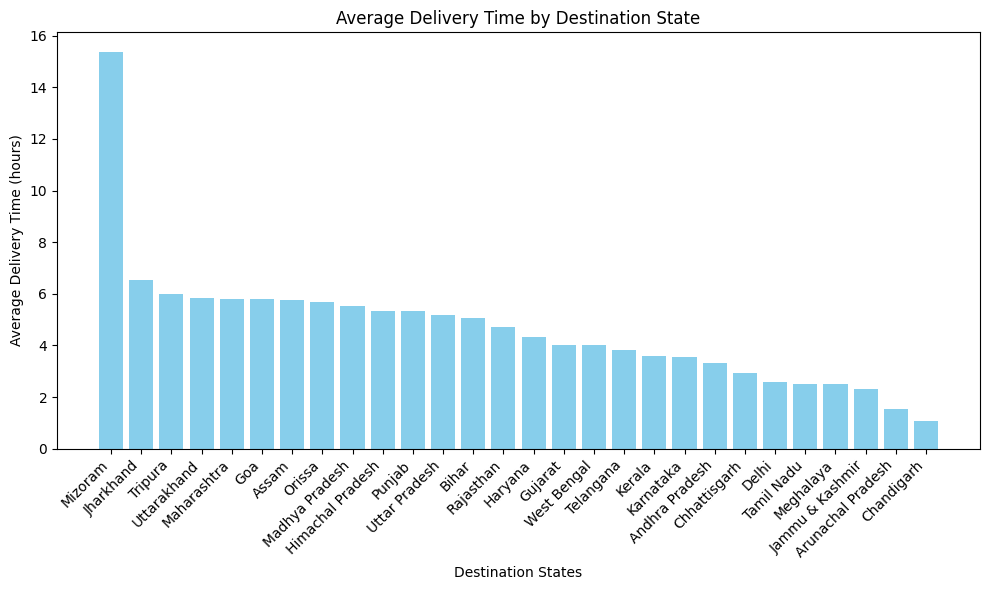

In [151]:
# Calculate average delivery time for each state
# Filter DataFrame to include only rows where source and destination states are same
df_different_states = df[df['source_states'] == df['destination_states']]

average_delivery_time_by_state = df_different_states.groupby('destination_states')['delivery_hrs'].mean().reset_index()

average_delivery_time_by_state_sorted = average_delivery_time_by_state.sort_values(by='delivery_hrs', ascending=False)

# Plot the average delivery time for each state
plt.figure(figsize=(10, 6))
plt.bar(average_delivery_time_by_state_sorted['destination_states'], average_delivery_time_by_state_sorted['delivery_hrs'], color='skyblue')
plt.title('Average Delivery Time by Destination State')
plt.xlabel('Destination States')
plt.ylabel('Average Delivery Time (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Observing delivery hours where delivery is in different state

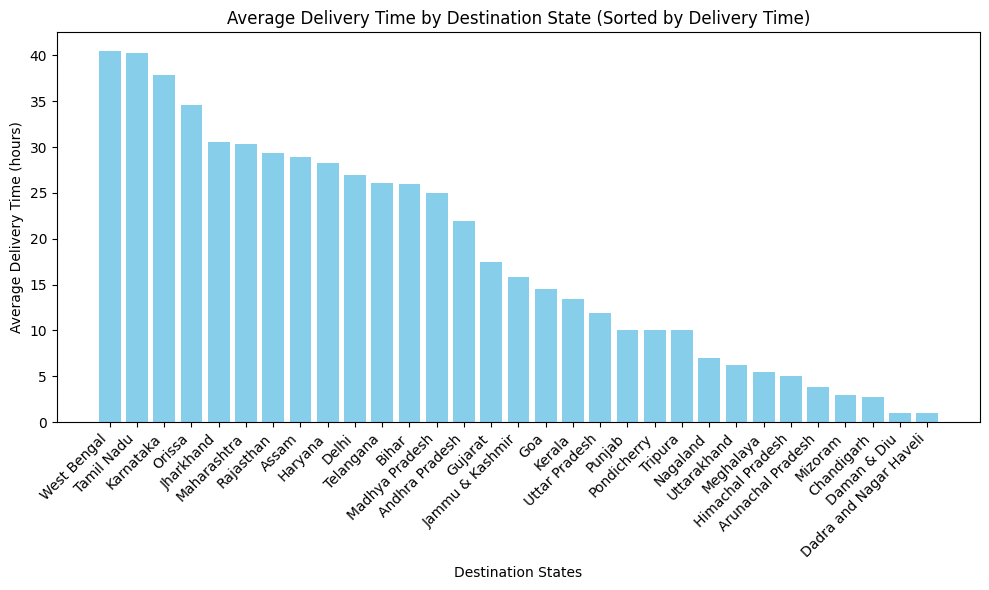

In [152]:
df_different_states = df[df['source_states'] != df['destination_states']]
average_delivery_time_by_state = df_different_states.groupby('destination_states')['delivery_hrs'].mean().reset_index()

# Sort the DataFrame by average delivery time in descending order
average_delivery_time_by_state_sorted = average_delivery_time_by_state.sort_values(by='delivery_hrs', ascending=False)

# Plot the average delivery time for each state
plt.figure(figsize=(10, 6))
plt.bar(average_delivery_time_by_state_sorted['destination_states'], average_delivery_time_by_state_sorted['delivery_hrs'], color='skyblue')
plt.title('Average Delivery Time by Destination State (Sorted by Delivery Time)')
plt.xlabel('Destination States')
plt.ylabel('Average Delivery Time (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## High Average Delivery Time by Destination Cities

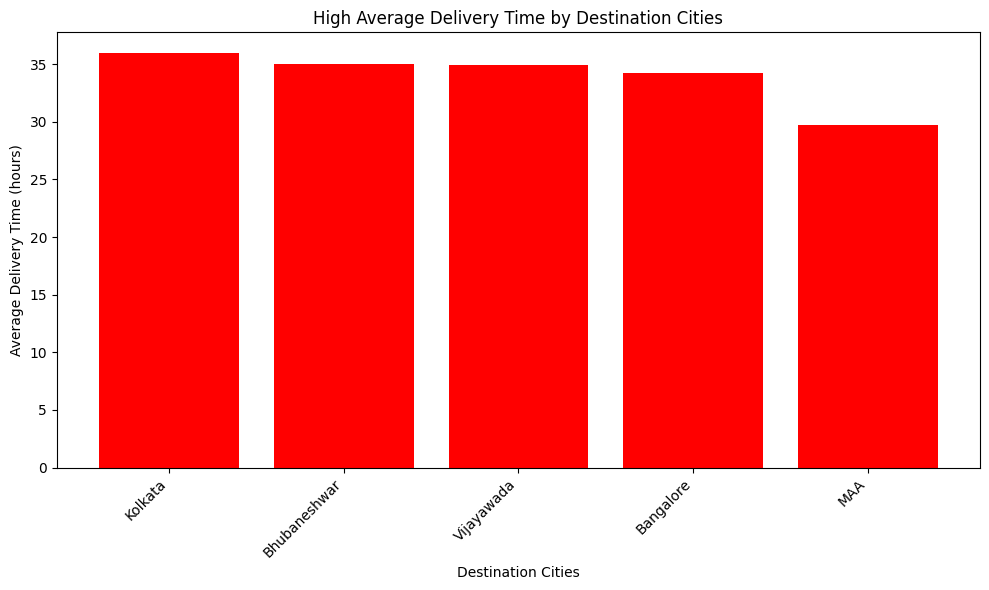

In [153]:
# Calculate average delivery time for each state
# Filter DataFrame to include only rows where source and destination states are same
df_different_cities = df[df['destination_cities'] == df['destination_cities']]

average_delivery_time_by_cities = df_different_cities.groupby('destination_cities')['delivery_hrs'].mean().reset_index()

average_delivery_time_by_cities_sorted = average_delivery_time_by_cities.sort_values(by='delivery_hrs', ascending=False)

top_5_cities = average_delivery_time_by_cities_sorted.head(5)

# Plot the average delivery time for each state
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities['destination_cities'], top_5_cities['delivery_hrs'], color='red')
plt.title('High Average Delivery Time by Destination Cities')
plt.xlabel('Destination Cities')
plt.ylabel('Average Delivery Time (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Low Average Delivery Time by Destination Cities

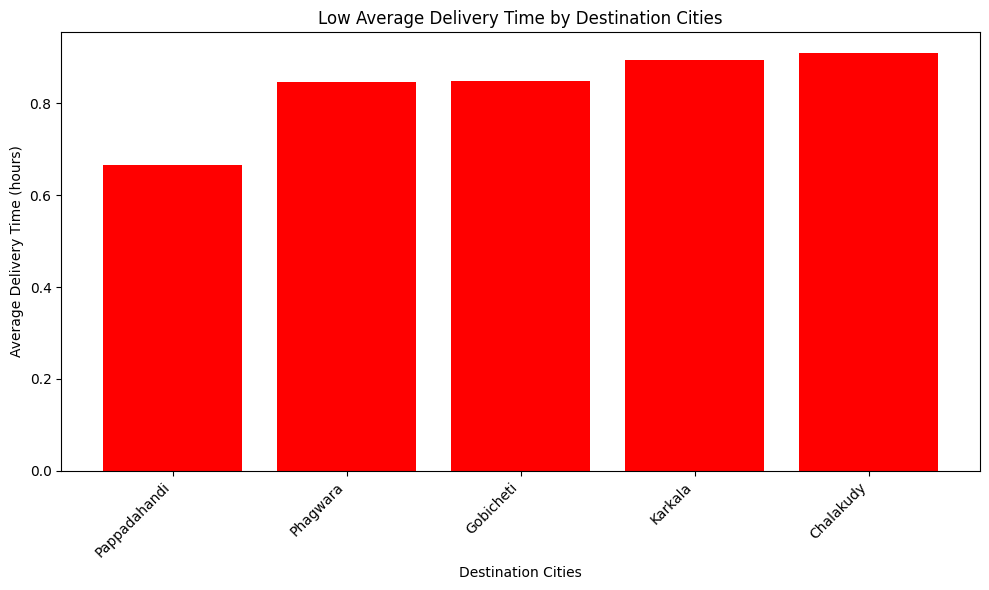

In [154]:
# Calculate average delivery time for each state
# Filter DataFrame to include only rows where source and destination states are same
df_different_cities = df[df['destination_cities'] == df['destination_cities']]

average_delivery_time_by_cities = df_different_cities.groupby('destination_cities')['delivery_hrs'].mean().reset_index()

average_delivery_time_by_cities_sorted = average_delivery_time_by_cities.sort_values(by='delivery_hrs', ascending=True)

top_5_cities = average_delivery_time_by_cities_sorted.head(5)

# Plot the average delivery time for each state
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities['destination_cities'], top_5_cities['delivery_hrs'], color='red')
plt.title('Low Average Delivery Time by Destination Cities')
plt.xlabel('Destination Cities')
plt.ylabel('Average Delivery Time (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Number of On-Time Deliveries by State

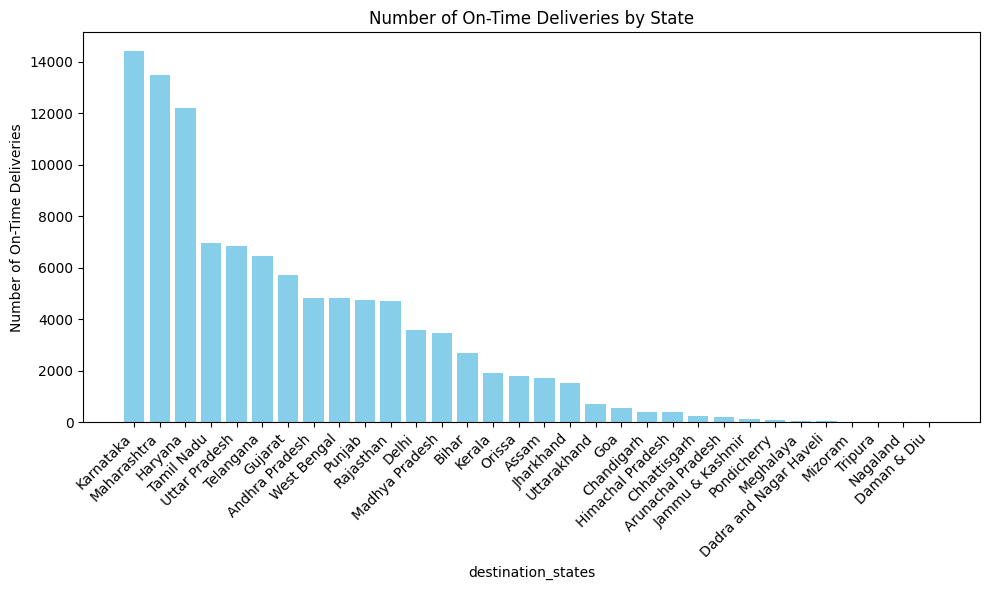

In [155]:
# Calculate the total number of on-time deliveries for each state
on_time_deliveries_by_state = df.groupby('destination_states')['on_time'].sum().reset_index()

# Sort states based on the total number of on-time deliveries in descending order
on_time_deliveries_by_state_sorted = on_time_deliveries_by_state.sort_values(by='on_time', ascending=False)

# Plot the number of on-time deliveries for states with the most on-time deliveries
plt.figure(figsize=(10, 6))
plt.bar(on_time_deliveries_by_state_sorted['destination_states'], on_time_deliveries_by_state_sorted['on_time'], color='skyblue')
plt.title('Number of On-Time Deliveries by State')
plt.xlabel('destination_states')
plt.ylabel('Number of On-Time Deliveries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Top 5 cities with On-Time Deliveries

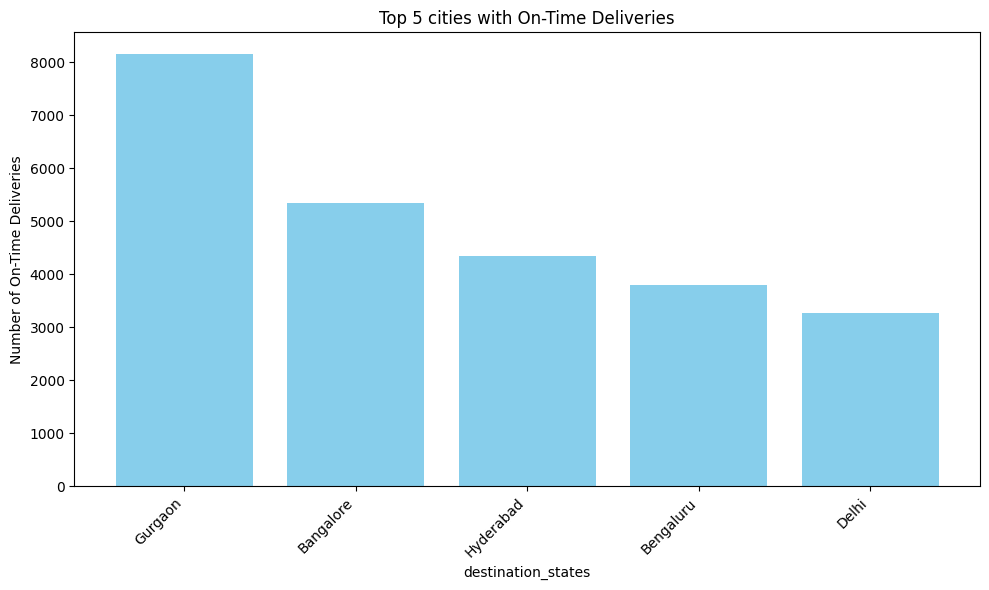

In [156]:
# Calculate the total number of on-time deliveries for each state
on_time_deliveries_by_cities = df.groupby('destination_cities')['on_time'].sum().reset_index()

# Sort states based on the total number of on-time deliveries in descending order
on_time_deliveries_by_cities_sorted = on_time_deliveries_by_cities.sort_values(by='on_time', ascending=False)

top5cities = on_time_deliveries_by_cities_sorted.head(5)
# Plot the number of on-time deliveries for states with the most on-time deliveries
plt.figure(figsize=(10, 6))
plt.bar(top5cities['destination_cities'], top5cities['on_time'], color='skyblue')
plt.title('Top 5 cities with On-Time Deliveries')
plt.xlabel('destination_states')
plt.ylabel('Number of On-Time Deliveries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

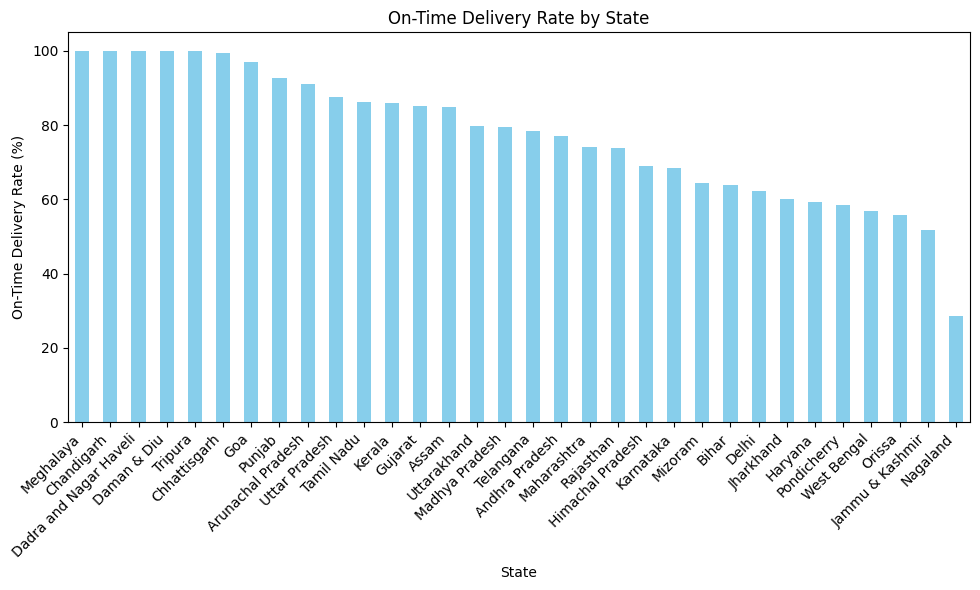

In [157]:
# Calculate the total number of deliveries for each state
total_deliveries_by_state = df['destination_states'].value_counts()

# Calculate the total number of on-time deliveries for each state
on_time_deliveries_by_state = df.groupby('destination_states')['on_time'].sum()

# Calculate the on-time delivery rate for each state
on_time_delivery_rate_by_state = (on_time_deliveries_by_state / total_deliveries_by_state) * 100

# Sort the on-time delivery rate by state in descending order
on_time_delivery_rate_by_state_sorted = on_time_delivery_rate_by_state.sort_values(ascending=False)

# Plot the on-time delivery rate for each state
plt.figure(figsize=(10, 6))
on_time_delivery_rate_by_state_sorted.plot(kind='bar', color='skyblue')
plt.title('On-Time Delivery Rate by State')
plt.xlabel('State')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## States with very high on-time delivery rate

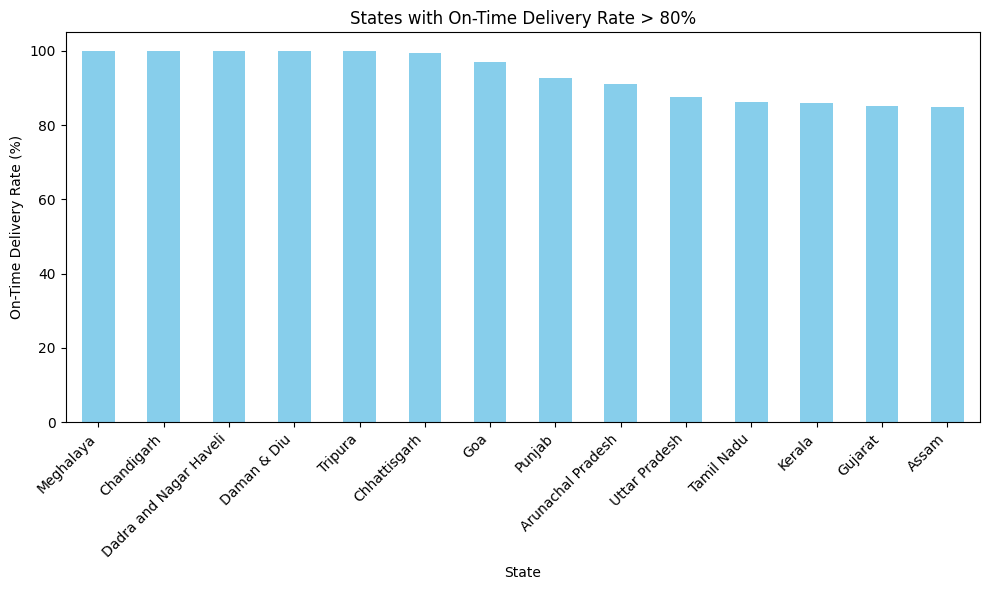

In [158]:
# Calculate the total number of deliveries for each state
total_deliveries_by_state = df['destination_states'].value_counts()

# Calculate the total number of on-time deliveries for each state
on_time_deliveries_by_state = df.groupby('destination_states')['on_time'].sum()

# Calculate the on-time delivery rate for each state
on_time_delivery_rate_by_state = (on_time_deliveries_by_state / total_deliveries_by_state) * 100

# Sort the on-time delivery rate by state in descending order
on_time_delivery_rate_by_state_sorted = on_time_delivery_rate_by_state.sort_values(ascending=False)

# Filter states with on-time delivery rate greater than 80%
on_time_delivery_rate_gt_80 = on_time_delivery_rate_by_state_sorted[on_time_delivery_rate_by_state > 80]

# Plot the on-time delivery rate for each state
plt.figure(figsize=(10, 6))
on_time_delivery_rate_gt_80.plot(kind='bar', color='skyblue')
plt.title('States with On-Time Delivery Rate > 80%')
plt.xlabel('State')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## States with very low on-time delivery rate

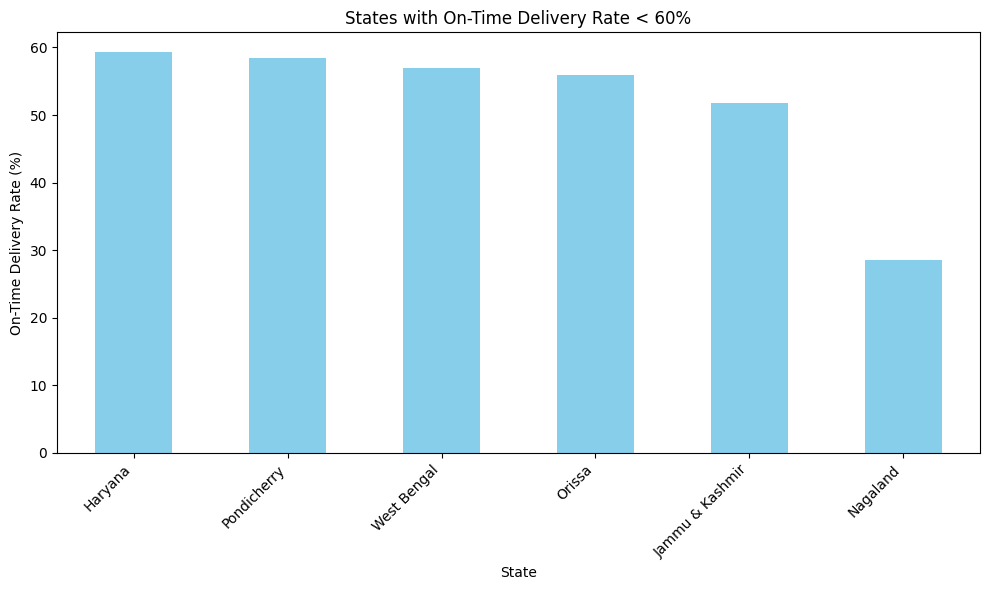

In [159]:
# Calculate the total number of deliveries for each state
total_deliveries_by_state = df['destination_states'].value_counts()

# Calculate the total number of on-time deliveries for each state
on_time_deliveries_by_state = df.groupby('destination_states')['on_time'].sum()

# Calculate the on-time delivery rate for each state
on_time_delivery_rate_by_state = (on_time_deliveries_by_state / total_deliveries_by_state) * 100

# Sort the on-time delivery rate by state in descending order
on_time_delivery_rate_by_state_sorted = on_time_delivery_rate_by_state.sort_values(ascending=False)

# Filter states with on-time delivery rate greater than 80%
on_time_delivery_rate_ls_50 = on_time_delivery_rate_by_state_sorted[on_time_delivery_rate_by_state < 60]

# Plot the on-time delivery rate for each state
plt.figure(figsize=(10, 6))
on_time_delivery_rate_ls_50.plot(kind='bar', color='skyblue')
plt.title('States with On-Time Delivery Rate < 60%')
plt.xlabel('State')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## States with moderate On-Time Delivery

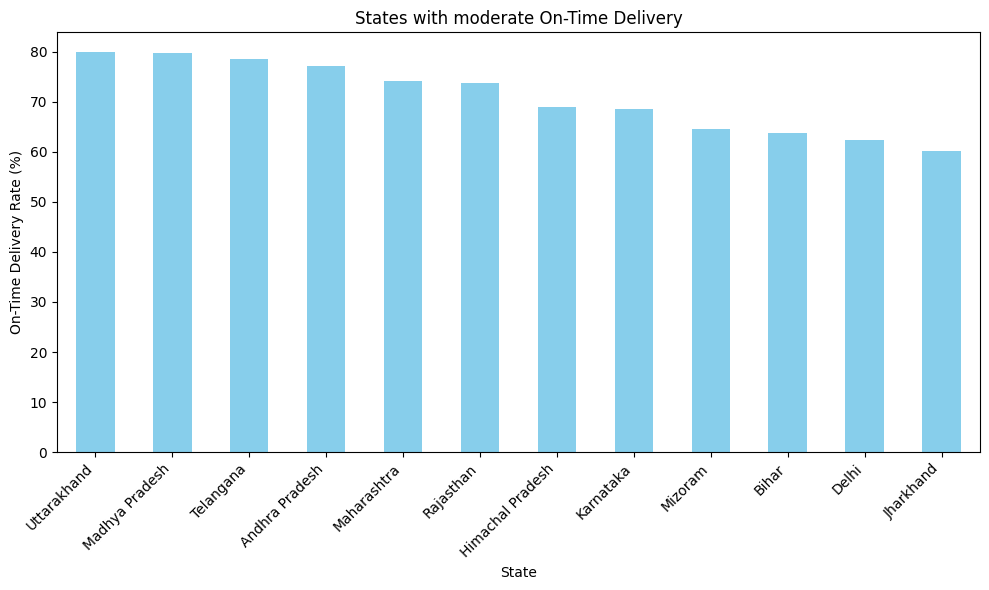

In [160]:
# Calculate the total number of deliveries for each state
total_deliveries_by_state = df['destination_states'].value_counts()

# Calculate the total number of on-time deliveries for each state
on_time_deliveries_by_state = df.groupby('destination_states')['on_time'].sum()

# Calculate the on-time delivery rate for each state
on_time_delivery_rate_by_state = (on_time_deliveries_by_state / total_deliveries_by_state) * 100

# Sort the on-time delivery rate by state in descending order
on_time_delivery_rate_by_state_sorted = on_time_delivery_rate_by_state.sort_values(ascending=False)

# Filter states with on-time delivery rate between 60% and 80%
on_time_delivery_rate_between_60_80 = on_time_delivery_rate_by_state_sorted[(on_time_delivery_rate_by_state >= 60) & (on_time_delivery_rate_by_state <= 80)]

# Plot the on-time delivery rate for each state
plt.figure(figsize=(10, 6))
on_time_delivery_rate_between_60_80.plot(kind='bar', color='skyblue')
plt.title('States with moderate On-Time Delivery')
plt.xlabel('State')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Cities with High On-Time Delivery Rate

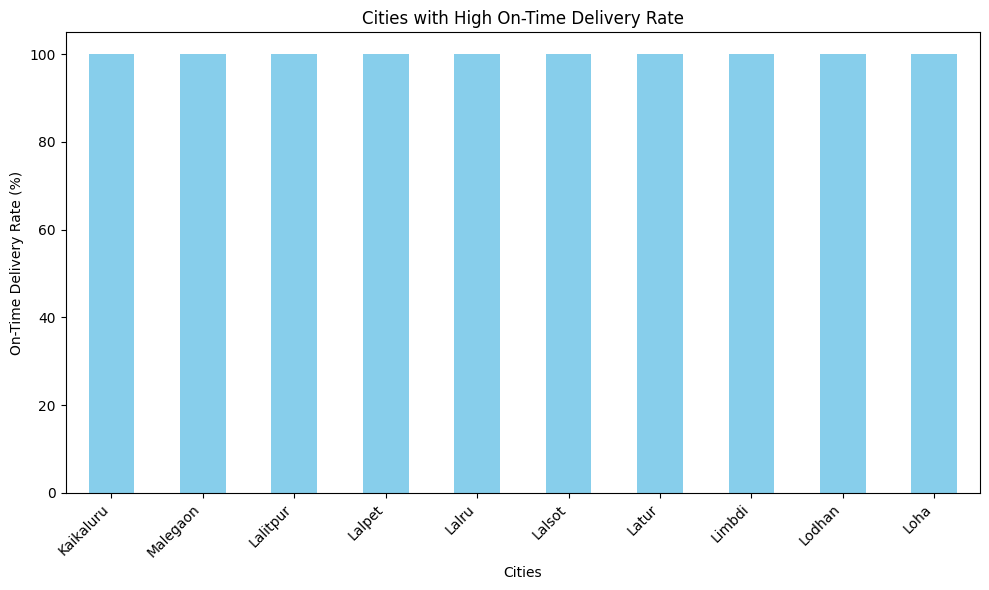

In [161]:
# Calculate the total number of deliveries for each state
total_deliveries_by_state = df['destination_cities'].value_counts()

# Calculate the total number of on-time deliveries for each state
on_time_deliveries_by_state = df.groupby('destination_cities')['on_time'].sum()

# Calculate the on-time delivery rate for each state
on_time_delivery_rate_by_state = (on_time_deliveries_by_state / total_deliveries_by_state) * 100

# Sort the on-time delivery rate by state in descending order
on_time_delivery_rate_by_state_sorted = on_time_delivery_rate_by_state.sort_values(ascending=False)

# Filter states with on-time delivery rate greater than 80%
on_time_delivery_rate_gt_80 = on_time_delivery_rate_by_state_sorted[on_time_delivery_rate_by_state > 80]

top10 = on_time_delivery_rate_gt_80.head(10)
# Plot the on-time delivery rate for each state
plt.figure(figsize=(10, 6))
top10.plot(kind='bar', color='skyblue')
plt.title('Cities with High On-Time Delivery Rate')
plt.xlabel('Cities')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Cities with Low On-Time Delivery Rate

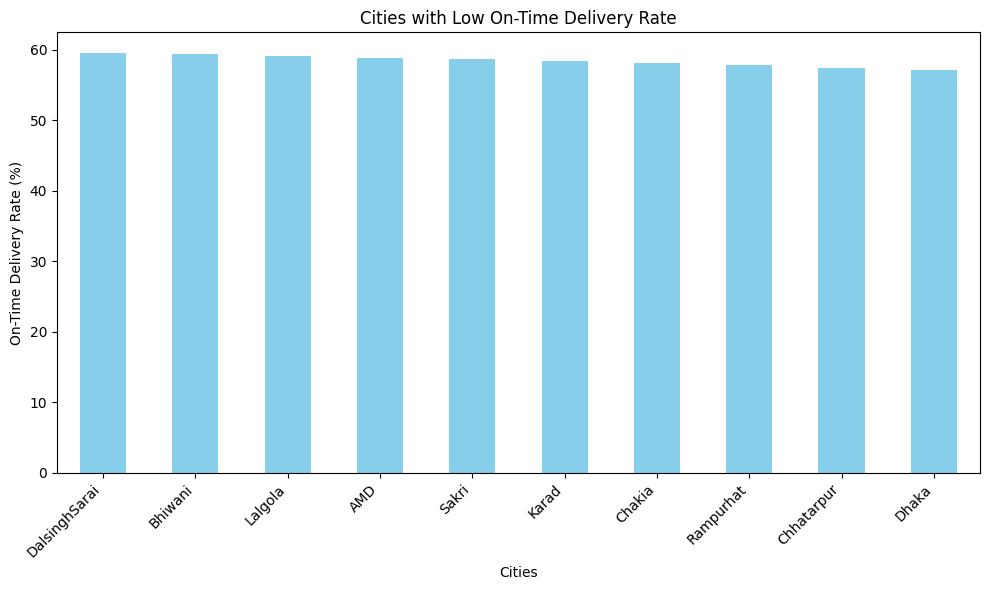

In [162]:
# Calculate the total number of deliveries for each state
total_deliveries_by_state = df['destination_cities'].value_counts()

# Calculate the total number of on-time deliveries for each state
on_time_deliveries_by_state = df.groupby('destination_cities')['on_time'].sum()

# Calculate the on-time delivery rate for each state
on_time_delivery_rate_by_state = (on_time_deliveries_by_state / total_deliveries_by_state) * 100

# Sort the on-time delivery rate by state in descending order
on_time_delivery_rate_by_state_sorted = on_time_delivery_rate_by_state.sort_values(ascending=False)

# Filter states with on-time delivery rate greater than 80%
on_time_delivery_rate_ls_50 = on_time_delivery_rate_by_state_sorted[on_time_delivery_rate_by_state < 60]

top10 = on_time_delivery_rate_ls_50.head(10)
# Plot the on-time delivery rate for each state
plt.figure(figsize=(10, 6))
top10.plot(kind='bar', color='skyblue')
plt.title('Cities with Low On-Time Delivery Rate')
plt.xlabel('Cities')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Cities with moderate On-Time Delivery

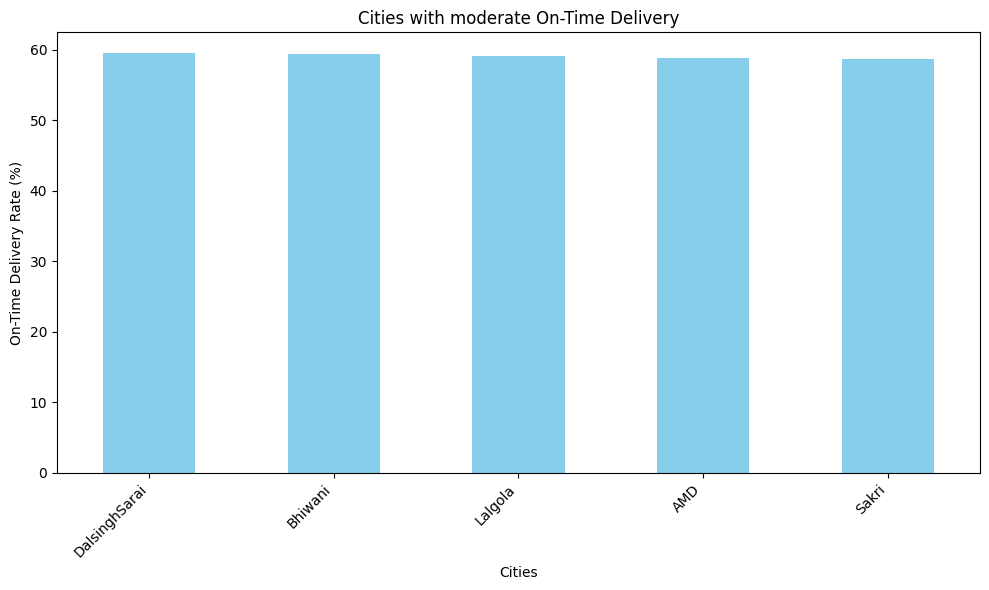

In [163]:
# Calculate the total number of deliveries for each state
total_deliveries_by_state = df['destination_cities'].value_counts()

# Calculate the total number of on-time deliveries for each state
on_time_deliveries_by_state = df.groupby('destination_cities')['on_time'].sum()

# Calculate the on-time delivery rate for each state
on_time_delivery_rate_by_state = (on_time_deliveries_by_state / total_deliveries_by_state) * 100

# Sort the on-time delivery rate by state in descending order
on_time_delivery_rate_by_state_sorted = on_time_delivery_rate_by_state.sort_values(ascending=False)

# Filter states with on-time delivery rate greater than 80%
on_time_delivery_rate_ls_50 = on_time_delivery_rate_by_state_sorted[on_time_delivery_rate_by_state < 60]
top5cities = on_time_delivery_rate_ls_50.head(5)
# Plot the on-time delivery rate for each state
plt.figure(figsize=(10, 6))
top5cities.plot(kind='bar', color='skyblue')
plt.title('Cities with moderate On-Time Delivery')
plt.xlabel('Cities')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Scatter Plot for Delivery Hours

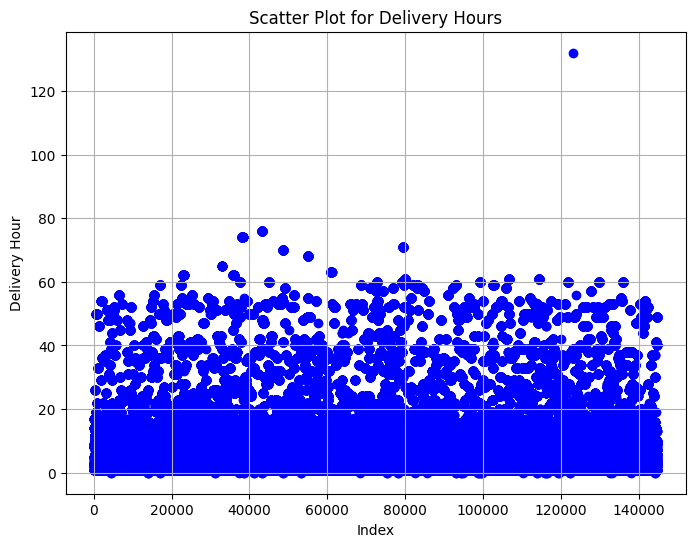

In [164]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df)), df['delivery_hrs'], color='blue')
plt.title('Scatter Plot for Delivery Hours')
plt.xlabel('Index')
plt.ylabel('Delivery Hour')
plt.grid(True)
plt.show()

## Number of On-Time Deliveries by Month (Descending Order)

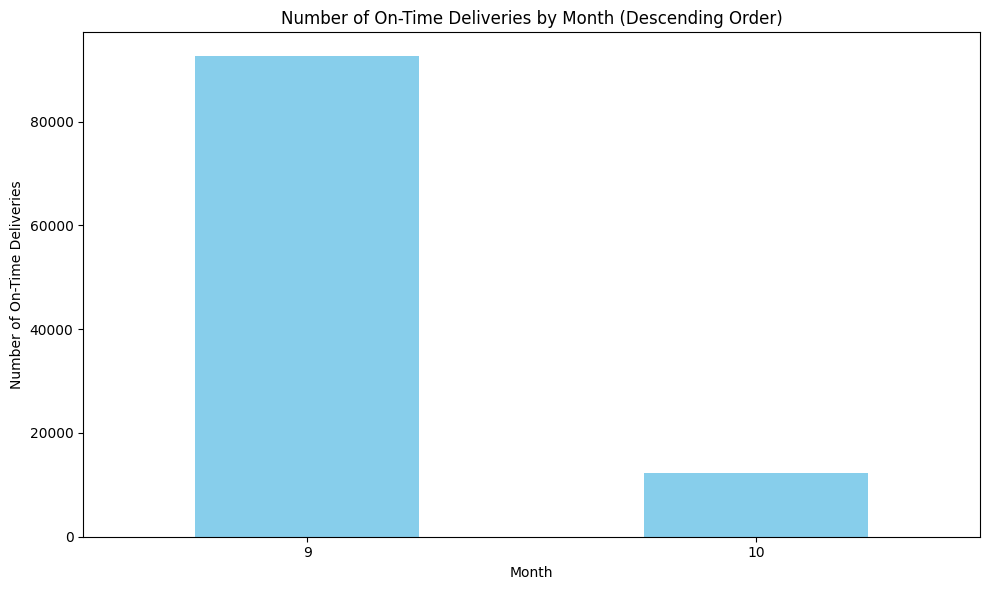

In [165]:
# Calculate the total number of on-time deliveries for each month
on_time_deliveries_by_month = df[df['on_time']].groupby('trip_creation_month').size()

# Sort the months by the number of on-time deliveries in descending order
on_time_deliveries_by_month_sorted = on_time_deliveries_by_month.sort_values(ascending=False)

# Plot the number of on-time deliveries for each month
plt.figure(figsize=(10, 6))
on_time_deliveries_by_month_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of On-Time Deliveries by Month (Descending Order)')
plt.xlabel('Month')
plt.ylabel('Number of On-Time Deliveries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Number of On-Time Deliveries by Year (Descending Order)

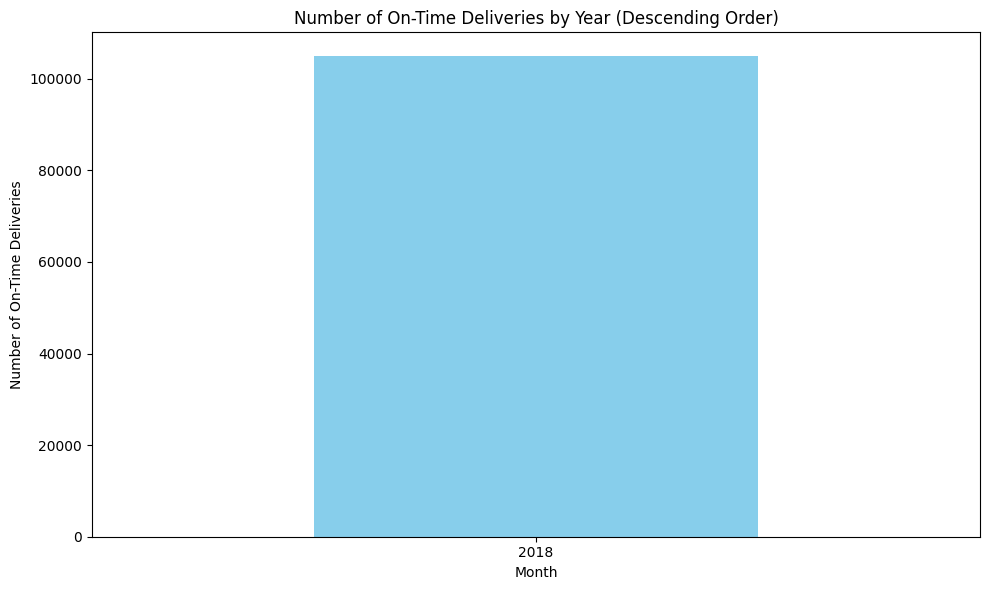

In [166]:
# Calculate the total number of on-time deliveries for each month
on_time_deliveries_by_month = df[df['on_time']].groupby('trip_creation_year').size()

# Sort the months by the number of on-time deliveries in descending order
on_time_deliveries_by_month_sorted = on_time_deliveries_by_month.sort_values(ascending=False)

# Plot the number of on-time deliveries for each month
plt.figure(figsize=(10, 6))
on_time_deliveries_by_month_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of On-Time Deliveries by Year (Descending Order)')
plt.xlabel('Month')
plt.ylabel('Number of On-Time Deliveries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Number of On-Time Deliveries by Route Type

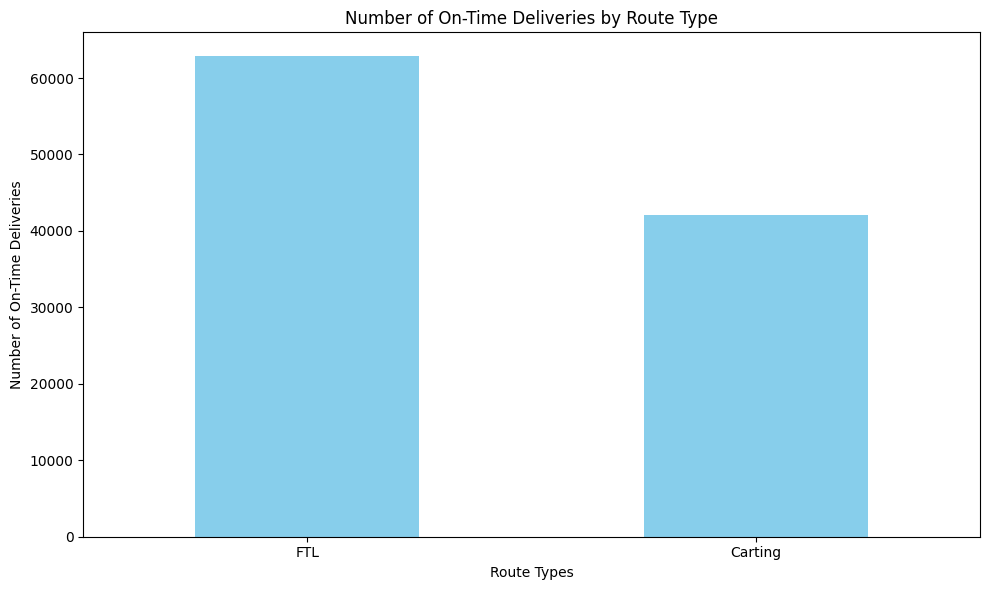

In [167]:
# Calculate the total number of on-time deliveries for each month
on_time_deliveries_by_month = df[df['on_time']].groupby('route_type').size()

# Sort the months by the number of on-time deliveries in descending order
on_time_deliveries_by_month_sorted = on_time_deliveries_by_month.sort_values(ascending=False)

# Plot the number of on-time deliveries for each month
plt.figure(figsize=(10, 6))
on_time_deliveries_by_month_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of On-Time Deliveries by Route Type')
plt.xlabel('Route Types')
plt.ylabel('Number of On-Time Deliveries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [168]:
df[['source_center','destination_center','actual_distance_to_destination','osrm_distance']].head(5)

,source_center,destination_center,actual_distance_to_destination,osrm_distance
0,IND388121AAA,IND388620AAB,10.435660,11.9653
1,IND388121AAA,IND388620AAB,18.936842,21.7243
2,IND388121AAA,IND388620AAB,27.637279,32.5395
3,IND388121AAA,IND388620AAB,36.118028,45.5620
4,IND388121AAA,IND388620AAB,39.386040,54.2181


In [169]:
df.head(5)

,data,trip_creation_time,route_type,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_states,destination_states,source_cities,destination_cities,delay_creation_start_hrs_diff,delay_cutoff_delivery_hrs_diff,delivery_hrs,trip_creation_month,trip_creation_year,actual_delivery_date,promised_date,on_time
0,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Gujarat,Gujarat,Anand,Khambhat,1,0,1,9,2018,2018-09-20,2018-09-20,True
1,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Gujarat,Gujarat,Anand,Khambhat,1,0,1,9,2018,2018-09-20,2018-09-20,True
2,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Gujarat,Gujarat,Anand,Khambhat,1,-1,1,9,2018,2018-09-20,2018-09-20,True
3,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Gujarat,Gujarat,Anand,Khambhat,1,-1,1,9,2018,2018-09-20,2018-09-20,True
4,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Gujarat,Gujarat,Anand,Khambhat,1,-1,1,9,2018,2018-09-20,2018-09-20,True


## Allocated Time by same destination State

In [170]:
# Calculate the allocated time in hours
df['allocated_time_hours'] = (df['cutoff_timestamp'] - df['od_end_time']).dt.total_seconds() / 3600


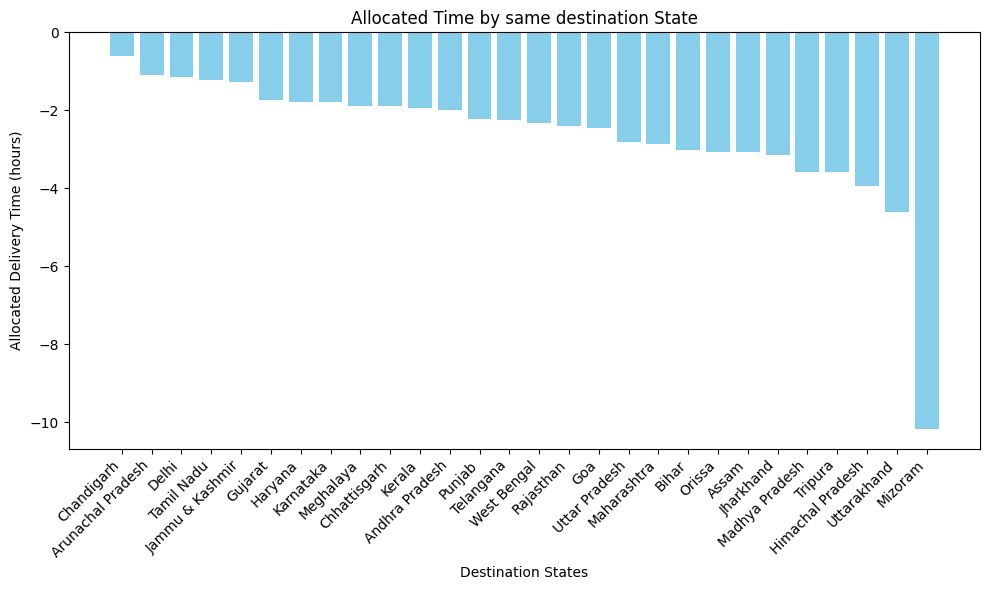

In [171]:
# Calculate average delivery time for each state
# Filter DataFrame to include only rows where source and destination states are same
df_different_states = df[df['source_states'] == df['destination_states']]

average_delivery_time_by_state = df_different_states.groupby('destination_states')['allocated_time_hours'].mean().reset_index()

average_delivery_time_by_state_sorted = average_delivery_time_by_state.sort_values(by='allocated_time_hours', ascending=False)

# Plot the average delivery time for each state
plt.figure(figsize=(10, 6))
plt.bar(average_delivery_time_by_state_sorted['destination_states'], average_delivery_time_by_state_sorted['allocated_time_hours'], color='skyblue')
plt.title('Allocated Time by same destination State')
plt.xlabel('Destination States')
plt.ylabel('Allocated Delivery Time (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Allocated Time by different destination State

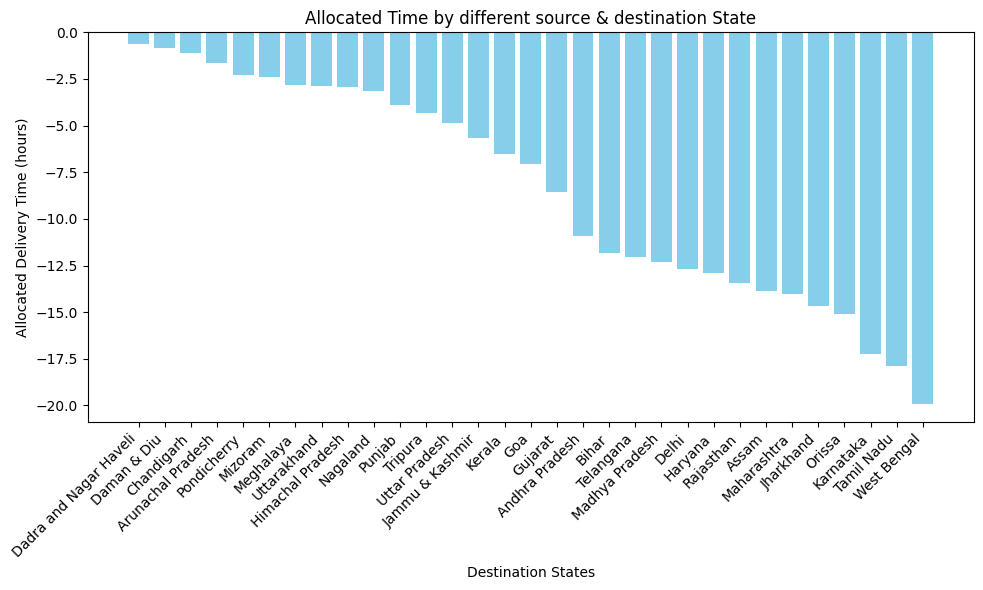

In [172]:
# Calculate average delivery time for each state
# Filter DataFrame to include only rows where source and destination states are same
df_different_states = df[df['source_states'] != df['destination_states']]

average_delivery_time_by_state = df_different_states.groupby('destination_states')['allocated_time_hours'].mean().reset_index()

average_delivery_time_by_state_sorted = average_delivery_time_by_state.sort_values(by='allocated_time_hours', ascending=False)

# Plot the average delivery time for each state
plt.figure(figsize=(10, 6))
plt.bar(average_delivery_time_by_state_sorted['destination_states'], average_delivery_time_by_state_sorted['allocated_time_hours'], color='skyblue')
plt.title('Allocated Time by different source & destination State')
plt.xlabel('Destination States')
plt.ylabel('Allocated Delivery Time (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

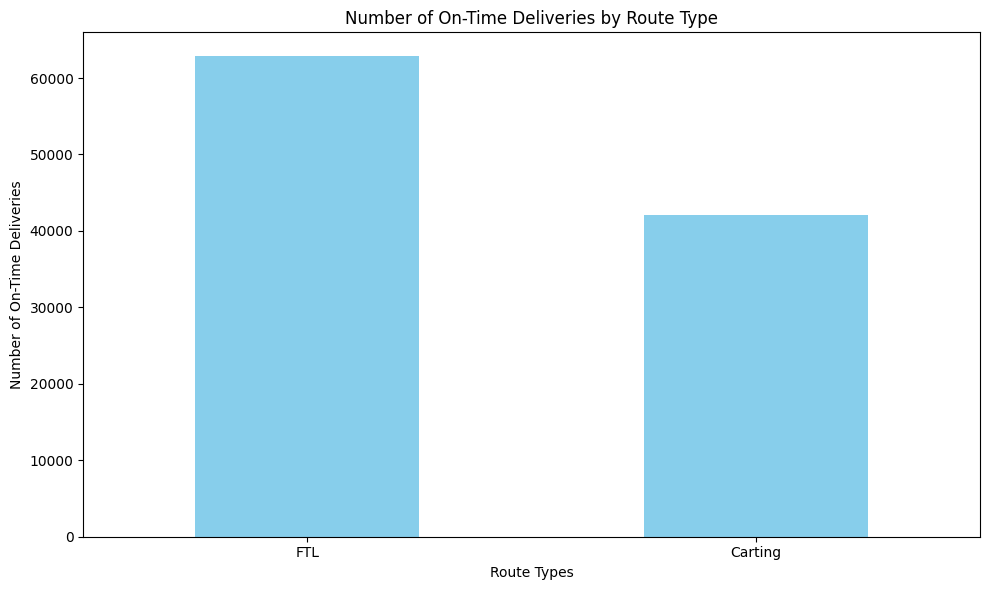

In [173]:
# Calculate the total number of on-time deliveries for each month
on_time_deliveries_by_month = df[df['on_time']].groupby('route_type').size()

# Sort the months by the number of on-time deliveries in descending order
on_time_deliveries_by_month_sorted = on_time_deliveries_by_month.sort_values(ascending=False)

# Plot the number of on-time deliveries for each month
plt.figure(figsize=(10, 6))
on_time_deliveries_by_month_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of On-Time Deliveries by Route Type')
plt.xlabel('Route Types')
plt.ylabel('Number of On-Time Deliveries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [174]:
df.columns

Index(['data', 'trip_creation_time', 'route_type', 'source_center',
       'destination_center', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'source_states', 'destination_states', 'source_cities',
       'destination_cities', 'delay_creation_start_hrs_diff',
       'delay_cutoff_delivery_hrs_diff', 'delivery_hrs', 'trip_creation_month',
       'trip_creation_year', 'actual_delivery_date', 'promised_date',
       'on_time', 'allocated_time_hours'],
      dtype='object')

## Delivery crossed the allocated hours

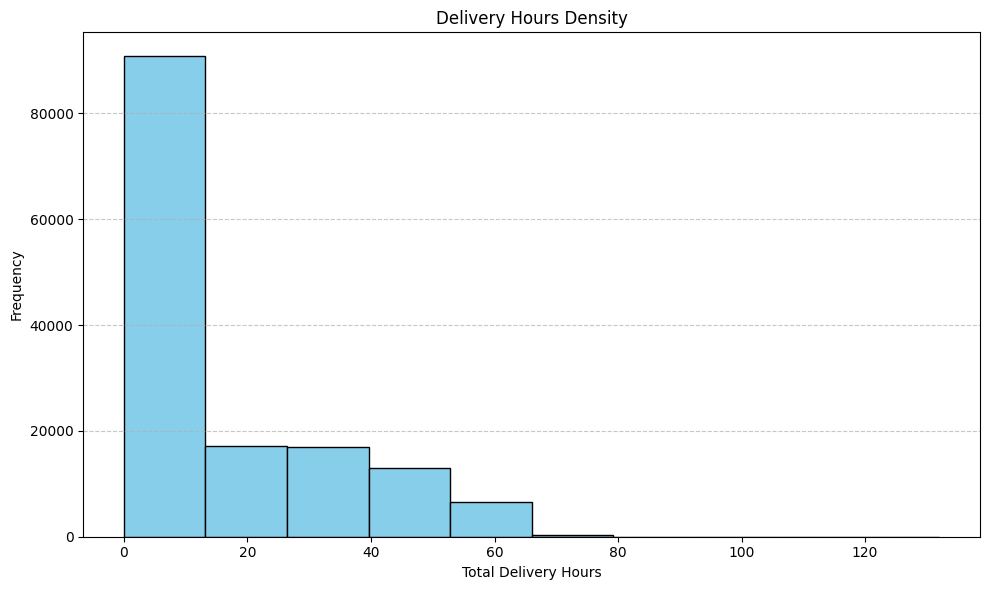

In [175]:
# Plot delivery density using histogram
plt.figure(figsize=(10, 6))
plt.hist(df['delivery_hrs'], bins=10, color='skyblue', edgecolor='black')
plt.title('Delivery Hours Density')
plt.xlabel('Total Delivery Hours')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Late Deliveries

In [193]:
filtered_df = df[df["allocated_time_hours"] > df["delivery_hrs"]]

len(filtered_df)

0

## Total Number of Deliveries for Each Month

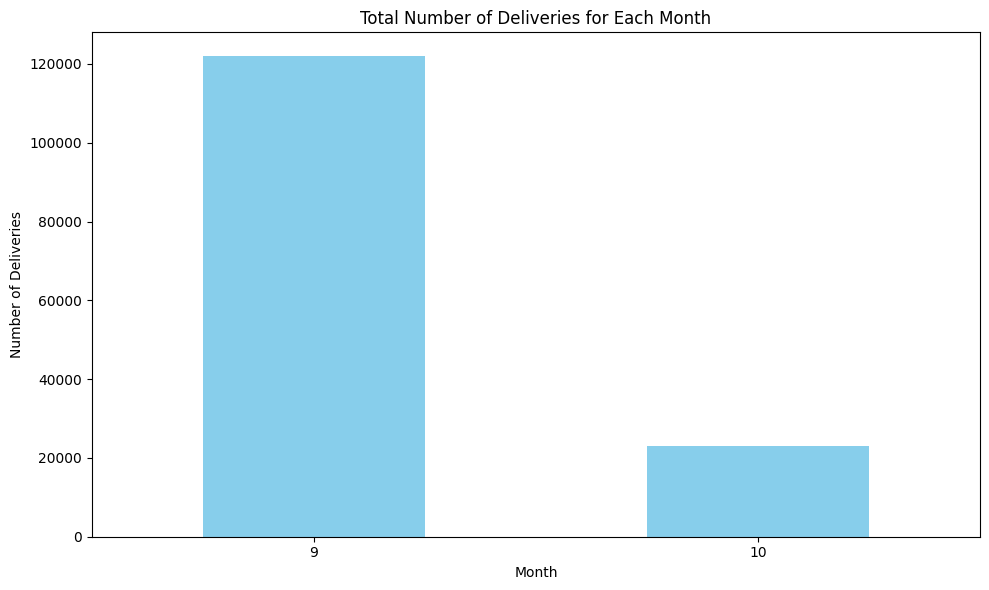

In [186]:
# Group by month and count the number of deliveries
# Convert DeliveryDate column to datetime
df['actual_delivery_date'] = pd.to_datetime(df['actual_delivery_date'])

monthly_deliveries = df.groupby(df['actual_delivery_date'].dt.month)['delivery_hrs'].count()

# Plot total number of deliveries for each month
plt.figure(figsize=(10, 6))
monthly_deliveries.plot(kind='bar', color='skyblue')
plt.title('Total Number of Deliveries for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()